# PY-5 DATA-601 Final Project

# A Study On Vehicle Crashes in the State of Maryland from years 2015 to 2021

In [ ]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)
hide_toggle()

##### Importing necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
hide_toggle()

##### Reading Datasets using API

In [ ]:
crashes = pd.read_csv('https://opendata.maryland.gov/resource/65du-s3qu.csv?$limit=800000', low_memory=False)
hide_toggle()

In [ ]:
persons = pd.read_csv('https://opendata.maryland.gov/resource/py4c-dicf.csv?$limit=2000000', low_memory=False)
hide_toggle()

In [ ]:
vehicles = pd.read_csv('https://opendata.maryland.gov/resource/mhft-5t5y.csv?$limit=1500000', low_memory=False)
hide_toggle()

# Introduction

In this notebook we will analyze crashes happening across the state of Maryland mainly from January 2015 through September 2021. The data is explored from the standpoints of time, fatality, location, weather, the vehicles makes and models, license classes and gender. The breakdown of the first four main standpoints is indicated in the following:

1. Time: Hourly, Daily, Weekly, Monthly, Yearly, Injury Type and Fatality
2. Fatality: Involving Fixed Objects, Speed Limit, Injury Type, Collision Type
3. Location: Fatality, Road Division
4. Weather: Injury Type, Surface Condition, Road Condition

For each of the main factors that are studied in our report we will give an explanatory data analysis which is described in the following sections. Based on our analysis and our observations we will provide some insights and hypothesize some reasons behind the phenomenon that we have observed. In the end, we will make some suggestions based on explanatory data analysis.



# Datasets

We are working on three crash datasets (accidents, persons, vehicles) gathered by the Police department of Maryland state from January 2015 through September 2021. The data has been published by the department of information and technology of the state of Maryland, and it is available on their public website. One of these datasets includes details about vehicles involved in accidents. This dataset has 1.39M rows and 49 columns. Another one includes details about people involved in accidents with 1.66M rows and 48 columns. The last one is data about each individual accident that has 743K rows where each one is described by 56 columns.


# Section 1

## Time distribution of crashes
In what follows we will be exploring the distributions of crashes based on different time frames. Time frames that we consider are as follows:
- Daily
- Monthly
- Quarterly
- Yearly

Each of these time frames elaborate on different aspects of crashes. For example, daily distribution provides us with the information of rush hours. Monthly distribution will help us to figure out which month of the year is the most crowded month of the year. If a quarter has the highest number of crashes it probably is the time of the year when people use their cars more. Finally yearly distribution helps to have an overall view of what is going on throughout a year. In the following we will present daily distributions.


### Daily distribution

By looking at daily distributions we are going to answers the following questions:
- Are distributions of different weekdays different from one another?
- Do rush hours happen at the same time every weekday?
- Among weekdays, which day has the least/most number of crashes? In other words, which day is the safest/dangerous day considering the number of accidents?
- Considering the above, which period of the safest day is the safest period from the standpoint of the number of accidents.

In [ ]:
# Converting date of the accident column into a datetime object
from datetime import datetime
crashes['accident_date'] = pd.to_datetime(crashes['acc_date'], format ='%Y%m%d')
crashes['accident_date']
hide_toggle()

In [ ]:
# converting time of the accident column into a datetime object
# and combining the two date time objects to create one single datetime object
crashes['accident_datetime'] = crashes['accident_date'] + pd.to_timedelta(crashes['acc_time'])
crashes['accident_datetime']
hide_toggle()

In [ ]:
# The number of accidents per each day
most_accident_day = crashes['accident_datetime'].dt.day_name().value_counts()
most_accident_day
hide_toggle()

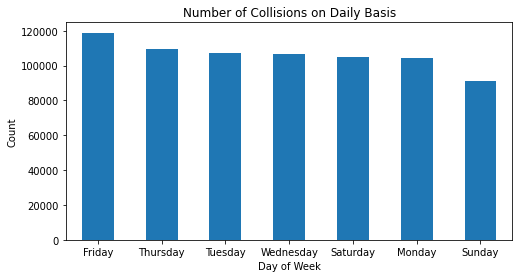

In [ ]:
# Plotting a bar chart of the number of accidents that happens in each day
most_accident_day.plot(kind = 'bar', figsize = (8,4))
plt.title("Number of Collisions on Daily Basis")
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.xticks(rotation = 0)
plt.show()
hide_toggle()

- As you can see in the above picture all days have almost the same number of accidents except for Fridays and Sundays.

- Fridays are days that most accidents happen and Sundays are days with the least number of accidents. Now the question is how these accidents are distributed hourly. Which will be addressed in the following.

### Hourly Distribution

In [ ]:
# Hourly counts of the number of accidents
most_accident_hour = crashes['accident_datetime'].dt.hour.value_counts(dropna = True)
most_accident_hour
hide_toggle()

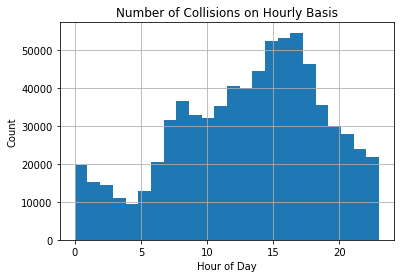

In [ ]:
# plot hourly counts of the number of accidents
crashes['accident_datetime'].dt.hour.hist(bins = 24)
plt.title("Number of Collisions on Hourly Basis")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.show()
hide_toggle()

- As you can see in the above picture, the time period between 3pm to 5pm has the highest number of accidents compared to other hours of week days.

In the following we will plot the distribution of each day.

In [ ]:
# creating a dictionary to extract everyday separately.
days_dict = {4: 'Thursday',
                1: 'Monday',
                0: 'Sunday',
                2: 'Tuesday',
                6: 'Saturday',
                5: 'Friday',
                3: 'Wednesday'}
hide_toggle()

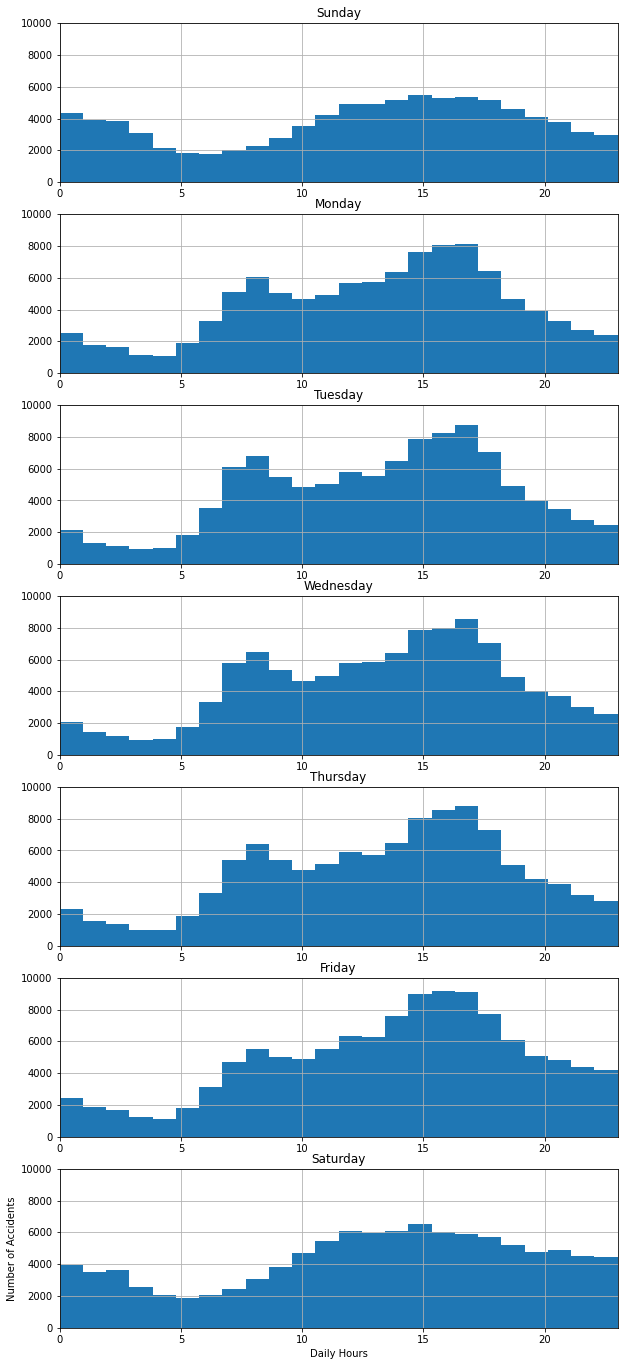

In [ ]:
# Plotting hourly distribution of weekdays
day_name = crashes['accident_datetime'].dt.day_name()
fig, ax = plt.subplots(7 , sharey='row')
plt.title("Hourly Distribution of Crashes on Daily Basis")
for i in range(7):
    day = crashes['accident_datetime'][day_name == days_dict[i]]
    max = day.max()
    id_max = day.idxmax()
    min = day.min()
    id_min = day.idxmin()
    ax_i = day.dt.hour.hist(bins = 24, ax=ax[i], figsize=(10, 24))
    ax_i.set_title(f'{days_dict[i]}')
    ax_i.set_xlim(0, 23)
    ax_i.set_ylim([0, 10000])
plt.xlabel("Daily Hours")
plt.ylabel("Number of Accidents")
hide_toggle()

As one can see we have the following observations:
- There are two periods with high numbers of accidents happening exactly at rush hours . ( 7am to 9am and 3pm to 5pm)
- Most accidents on Fridays happen at 4pm.
- Weekends(Saturday and Sunday) the most number of accidents happen between 12pm to 16pm consistantly. 
- On Saturdays and Fridays the number of accidents are still high from 7pm to midnight which is consistent with what we expect from weekends.

### Severity of Accidents according to time of day

##### Note: While we are looking at the severity of accidents, we will keep accidents with No Injuries aside and only look at incidents where any other sort of Injury has taken place

In [ ]:
# joinig two datasets
crashes_persons = pd.merge(crashes[['report_no', 'log_mile', 'acc_time', 'accident_datetime', 'weather_desc', 'rd_cond_desc',
                                    'surf_cond_desc', 'collision_type_desc', 'junction_desc', 'fix_obj_desc', 'lane_desc',
                                    'harm_event_desc1','harm_event_desc2']],
                           persons[['report_no', 'inj_sever_desc', 'class', 'sex_code']],
                           on='report_no', how='left',suffixes = ( '_crashes', '_persons'))
hide_toggle()

In [ ]:
#creating function to add hour column
def hour(string):
    s=string[0:2]
    return int(s)
crashes_persons['hour']=crashes_persons['acc_time'].apply(lambda x: hour(x))
hide_toggle()

In [ ]:
#creating function to identify time of day: morning, afternoon, evening, night, etc.
def time_of_day(n):
    if n in range(4,8):
        return 'Early Morning'
    elif n in range(8,12):
        return 'Morning'
    elif n in range(12,17):
        return 'Afternoon'
    elif n in range(17,20):
        return 'Evening'
    elif n in range(20,25) or n==0:
        return 'Night'
    elif n in range(1,4):
        return 'Late Night'
hide_toggle()

In [ ]:
crashes_persons['Time_of_Day']=crashes_persons['hour'].apply(lambda x: time_of_day(x))
hide_toggle()

In [ ]:
crashes_persons['true_inj_sever_desc'] = crashes_persons['inj_sever_desc'].where(crashes_persons['inj_sever_desc']!= 'No Injury')
hide_toggle()

In [ ]:
crashes_persons['fatal_inj_sever_desc'] = crashes_persons['inj_sever_desc'].where(crashes_persons['inj_sever_desc']== 'Fatal Injury')
hide_toggle()

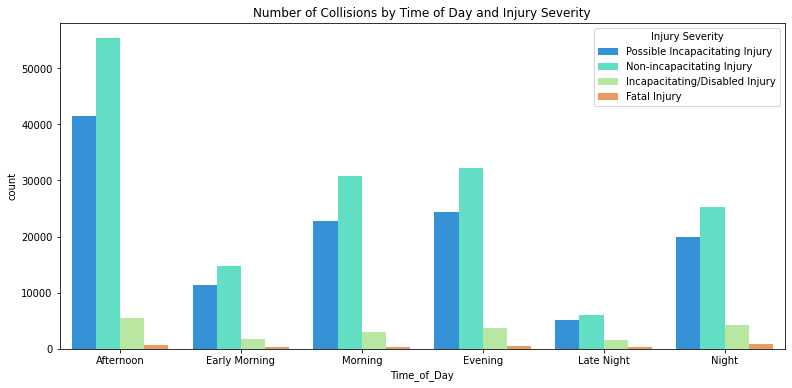

In [ ]:
plt.figure(figsize=(13,6))
sns.countplot(x='Time_of_Day',data=crashes_persons,hue='true_inj_sever_desc',palette='rainbow')
plt.legend().set_title("Injury Severity")
plt.title("Number of Collisions by Time of Day and Injury Severity")
hide_toggle()

As we can see, most injuries take place during the Afternoon. The number of accidents resulting in injuries is very similar during the morning and evening times.

Since, the pattern for Fatal Injury Type is not clearly visible in the chart above, we plot a different chart especially for Fatal Injury type

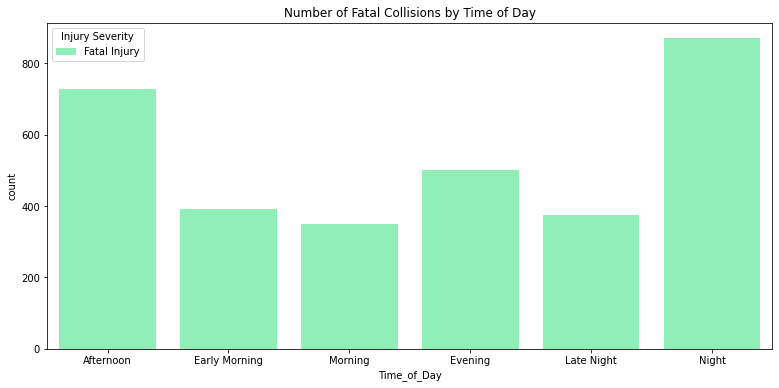

In [ ]:
plt.figure(figsize=(13,6))
sns.countplot(x='Time_of_Day',data=crashes_persons,hue='fatal_inj_sever_desc',palette='rainbow')
plt.legend().set_title("Injury Severity")
plt.title("Number of Fatal Collisions by Time of Day")
hide_toggle()

Surprisingly, the count of fatal injuries is significantly high at night as compared to afternoon. 

### Monthly distribution

In [ ]:
# Extracting number of accidents in each month
most_accident_month = crashes['accident_datetime'].dt.month.value_counts()
most_accident_month
hide_toggle()

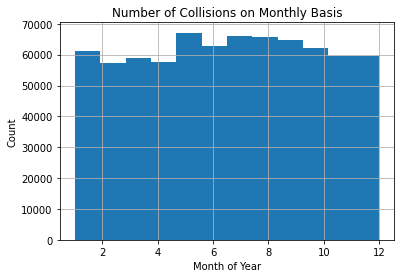

In [ ]:
# Plotting the number of accidents in each month
crashes['accident_datetime'].dt.month.hist(bins = 12)
plt.title("Number of Collisions on Monthly Basis")
plt.xlabel("Month of Year")
plt.ylabel("Count")
plt.show()
hide_toggle()

- As we can see, the most accidents happen in May.

### Quarter data

In [ ]:
# Extracting number of accidents in each quarters 
most_accident_quarter = crashes['accident_datetime'].dt.quarter.value_counts().sort_index()
most_accident_quarter
hide_toggle()

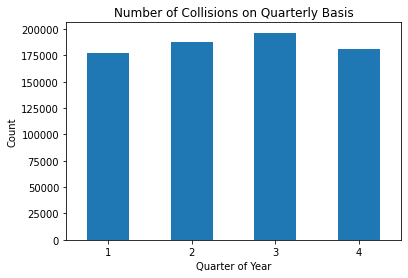

In [ ]:
# Plotting the number of accidents in each quarters 
most_accident_quarter.plot(kind = 'bar')
plt.xticks(rotation= 0 )
plt.title("Number of Collisions on Quarterly Basis")
plt.xlabel("Quarter of Year")
plt.ylabel("Count")
plt.show()
hide_toggle()

- As you can see, the most accidents happen in the third quarter.

### Yearly distribution
By exploring the number of accidents in each year we try to answer the following questions:
- Which year has the most number of accidents? 
- What is the decline percentage from 2019 to 2020? (Possible decline in number of crashes due to pandemic)

In [ ]:
# Extracting the number of accidents happened in each year
year = crashes['year'].value_counts(dropna = True)
year
hide_toggle()

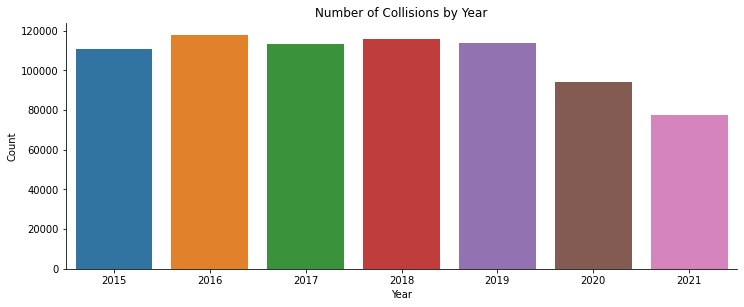

In [ ]:
# Plotting bar chart on the number of accident in each year
g = sns.catplot(data = crashes, x = 'year', kind = 'count', order= crashes['year'].value_counts().sort_index().index)
g.fig.set_size_inches(12,4)
plt.title("Number of Collisions by Year")
plt.xlabel("Year")
plt.ylabel("Count")
hide_toggle()

Compared to 2019 the number of crashes has decreased and we believe that's the effect of the pandemic. 

In [ ]:
# Calculating the percentage of decreasing the number of accidents
average_upto_2020 = crashes['year'].value_counts(dropna = False, sort = False)[:5].mean()
crashes['year'].value_counts(dropna = False, sort = False).loc[2020]
hide_toggle()

In [ ]:
average_upto_2020/94207
hide_toggle()

In [ ]:
# Percentage of decrease on average
(1-average_upto_2020/94207)*100
hide_toggle()

In [ ]:
# Percentage of decrease compare to 2019
(1-113513/94207)*100
hide_toggle()

- There was a decrease of 20.5% from year 2019 to 2020 in the number of crashes. We believe that this was probably due to the pandemic
- On an average there was a 17.2% decrease in the number of accidents for the year 2020 compared to previous years

After conducting a high level time series analysis we plan to look at important factors that might be affecting the number of crashes over the years.

### Speed limit

By exploring the data from the standpoint of the speed limit we are going to answer the following questions:

- Is it correct that if you drive fast the probability of the accident is increased?
- Do we have spikes in the number of crashes when the speed limit is high?


In [ ]:
# Exploring the speed limit that the most number of accidents happened
vehicles['speed_limit'].value_counts(dropna = True)
hide_toggle()

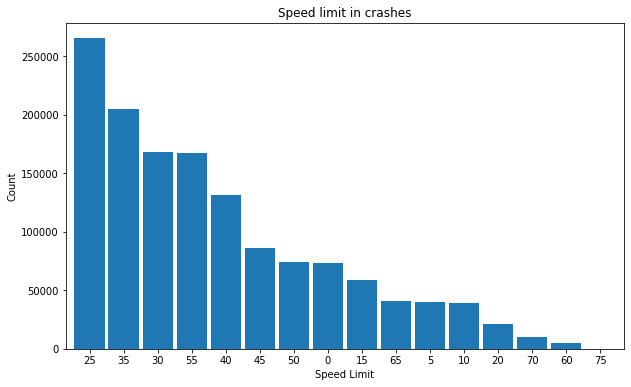

In [ ]:
### Plotting the number of accidents in descending order
speed_limit = vehicles['speed_limit'].value_counts(dropna = True)
speed_limit.plot(kind = 'bar', figsize=(10,6), width = 0.9)
plt.xticks(rotation= 0 )
plt.title('Speed limit in crashes')
plt.xlabel("Speed Limit")
plt.ylabel("Count")
plt.show()
hide_toggle()

As you can see at the speed limit of 25 we have the most number of crashes and the least number of crashes happen at the speed limit of 75. So the belief that if we drive fast the probability of an accident increases is wrong.

In [ ]:
veh_persons = pd.merge(vehicles[['report_no', 'speed_limit']], persons[['report_no', 'inj_sever_desc']], on='report_no', how='left',suffixes = ( '_vehicles', '_persons'))
hide_toggle()

In [ ]:
# Extracting the number of accident corresponding to each injury types
veh_persons['inj_sever_desc'].value_counts(dropna = True)
hide_toggle()

In [ ]:
# See what type of injury happened in speed limit 25 and extracting the number of them
veh_persons_25 = veh_persons[veh_persons['speed_limit'] ==25]
veh_persons_25['inj_sever_desc'].value_counts(dropna = True)
hide_toggle()

In [ ]:
# Extracting the number of fatal accident corresponding to each speed limit
veh_persons_fatal = veh_persons[veh_persons['inj_sever_desc'] == 'Fatal Injury']
veh_persons_fatal['speed_limit'].value_counts(dropna = True)
hide_toggle()

In what follows we are going to find the relationship beetween injury type, and the speed limit. This can be done using a pivot table. The purpose of doing this is to ascertain if there is a particular type of injury associated with a given speed limit.

In [ ]:
# Creating a range in order to group speed limits into classes
speed_limit_range = list(range(0, 105, 5))
hide_toggle()

In [ ]:
# Creating a new column to store speed limit by classes of 5 miles per hour per class
veh_persons['speed_limit_grouped'] = pd.cut(veh_persons['speed_limit'], bins=speed_limit_range, include_lowest=False)
hide_toggle()

In [ ]:
# Creating custom colors for easy reference in the following chart

colorbar = ['aqua','black','blue', 'blueviolet', 'brown',
         'orange', 'chartreuse', 'coral', 'darkgoldenrod', 'darkgreen',
         'darkorchid', 'pink', 'deeppink', 'green', 'gold',
         'indianred', 'khaki', 'lightpink', 'midnightblue']
hide_toggle()

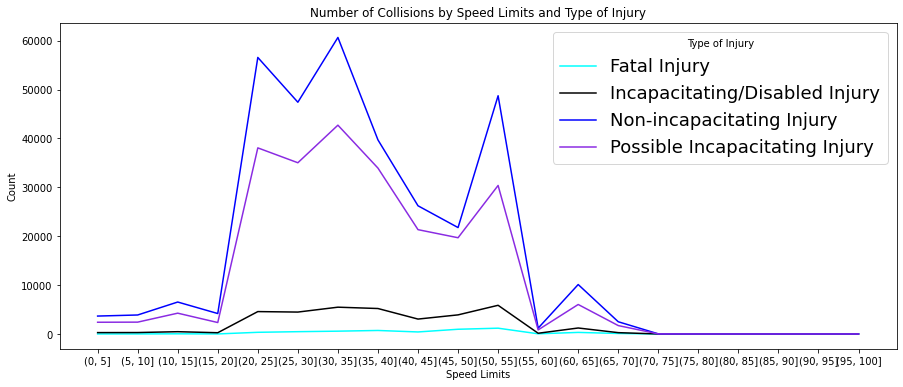

In [ ]:
inj_speed_limit = veh_persons.where(veh_persons['inj_sever_desc']!='No Injury').pivot_table('speed_limit_grouped', aggfunc = 'count', columns = ['inj_sever_desc'], index = veh_persons.speed_limit_grouped)
inj_speed_limit.plot(figsize=(15,6), subplots = False, color = colorbar)
plt.xticks(range(0, len(inj_speed_limit.index)), inj_speed_limit.index)
plt.legend(inj_speed_limit.columns, fontsize=18).set_title("Type of Injury")
plt.title("Number of Collisions by Speed Limits and Type of Injury")
plt.xlabel("Speed Limits")
plt.ylabel("Count")
plt.show()
hide_toggle()

- We can see that for all injury types, they follow the similar pattern where the accidents seem to be the highest in speed limits 20-55 miles per hour with a slight peak at 60-65 miles per hour

We are not able to identify how to graph looks for 'Fatal Injury' from the above chart. Following is a chart showing cases of Fatal Injuries at different speed limits

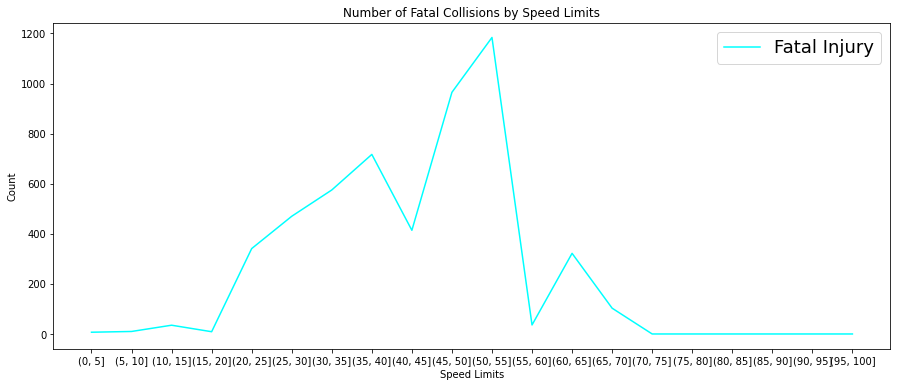

In [ ]:
fatal_inj_speed_limit = veh_persons.where(veh_persons['inj_sever_desc']=='Fatal Injury').pivot_table('speed_limit_grouped', aggfunc = 'count', columns = ['inj_sever_desc'], index = veh_persons.speed_limit_grouped)
fatal_inj_speed_limit.plot(figsize=(15,6), subplots = False, color = colorbar)
plt.xticks(range(0, len(fatal_inj_speed_limit.index)), fatal_inj_speed_limit.index)
plt.legend(fatal_inj_speed_limit.columns, fontsize=18)
plt.title("Number of Fatal Collisions by Speed Limits")
plt.xlabel("Speed Limits")
plt.ylabel("Count")
plt.show()
hide_toggle()

- Here also we see the same pattern. A rise in the number of Fatal crashes between speed limits of 20-55 miles per hour with a slight peak at 60-65 miles per hour

Now that we know that most crashes occur between these speed limits, let's see if there is a pattern in locations at which most crashes occur. If we are able to identify particular locations where accidents are more likely to happen, prevention measures can be directed at such locations.

In [ ]:
# Grouping the milepoints for accidents into range of 1 mile each
# We found that most crashes happened within 70 milepoint range.
# Hardly any crashes have been recorded at mile points as great as 100, 200 etc.
# Hence we stick to th 70 mile point as the max range for our analysis
log_mile_range = list(range(-2, 71))
hide_toggle()

In [ ]:
crashes_persons['log_mile_till_70'] = pd.cut(crashes_persons['log_mile'], bins=log_mile_range, include_lowest=True)
hide_toggle()

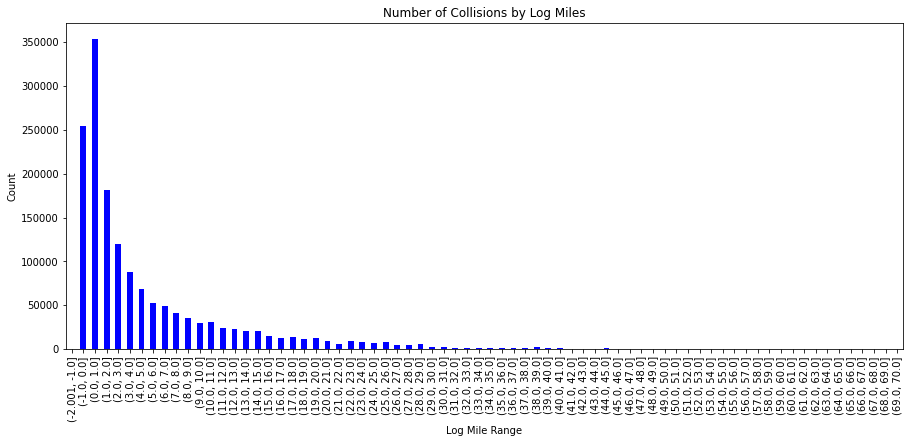

In [ ]:
crashes_persons['log_mile_till_70'].value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(15,6))
plt.xticks(rotation = 90)
plt.title("Number of Collisions by Log Miles")
plt.xlabel("Log Mile Range")
plt.ylabel("Count")
plt.show()
hide_toggle()

- We can see most number of crashes take place between the first mile of any given road / driveway. Also, the second highest number of crashes take place just 1 mile before the start of any given road. This is common knowledge that these two mile ranges are generally places where most cars either crowd up or disperse in order to enter a given road or exit respectively. This could be a major reason for most accidents happening in these initial mile ranges of a given road. As we move forward in distance, the number of accidents seems to keep decreasing.

Moving ahead we try to see if Fatal injuries tend to happen more or less at particular locations

In [ ]:
veh_persons_inj_speed_lim = veh_persons[['report_no','inj_sever_desc', 'speed_limit_grouped']]
hide_toggle()

In [ ]:
crashes_person_veh = pd.merge(crashes, veh_persons_inj_speed_lim, on='report_no', how='left')
hide_toggle()

In [ ]:
crashes_person_veh['log_mile_till_70'] = pd.cut(crashes_person_veh['log_mile'], bins=log_mile_range, include_lowest=True)
hide_toggle()

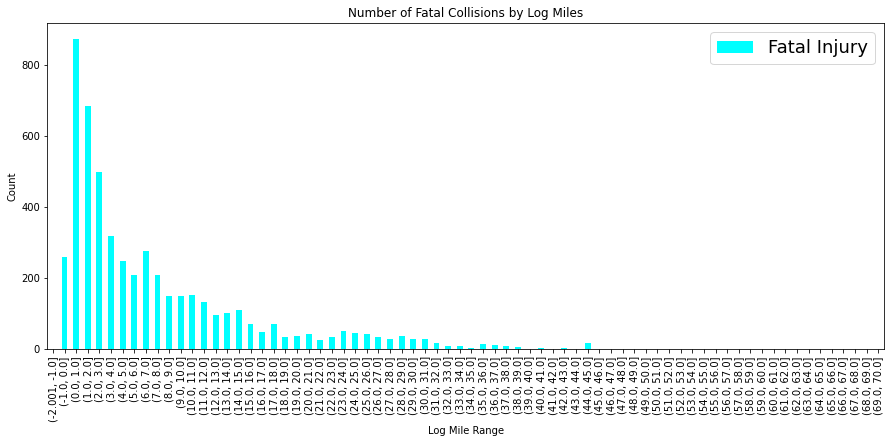

In [ ]:
fatal_inj_log_miles = crashes_person_veh.where(crashes_person_veh['inj_sever_desc']=='Fatal Injury').pivot_table('log_mile_till_70', aggfunc = 'count', columns = ['inj_sever_desc'], index = crashes_person_veh.log_mile_till_70)
fatal_inj_log_miles.plot(kind = 'bar', figsize=(15,6), subplots = False, color = colorbar)
plt.xticks(range(0, len(fatal_inj_log_miles.index)), fatal_inj_log_miles.index, rotation = 90)
plt.legend(fatal_inj_log_miles.columns, fontsize=18)
plt.title("Number of Fatal Collisions by Log Miles")
plt.xlabel("Log Mile Range")
plt.ylabel("Count")
plt.show()
hide_toggle()

- As we saw earlier, the first couple of miles for any given road are hot points for collisions and can potentially lead to fatal injuries. More emphasis should be given towards regulation of traffic, availability of medical assistance and installation of safety measures in these initial couple of miles.

### Types of Junctions Prone to Accidents

Now, we know which mile ranges we should be focusing at. However, it would make more sense if we could figure out junctions at these mile ranges which are more prone to accidents. This will help in directing the crash mitigation efforts to ground zero.

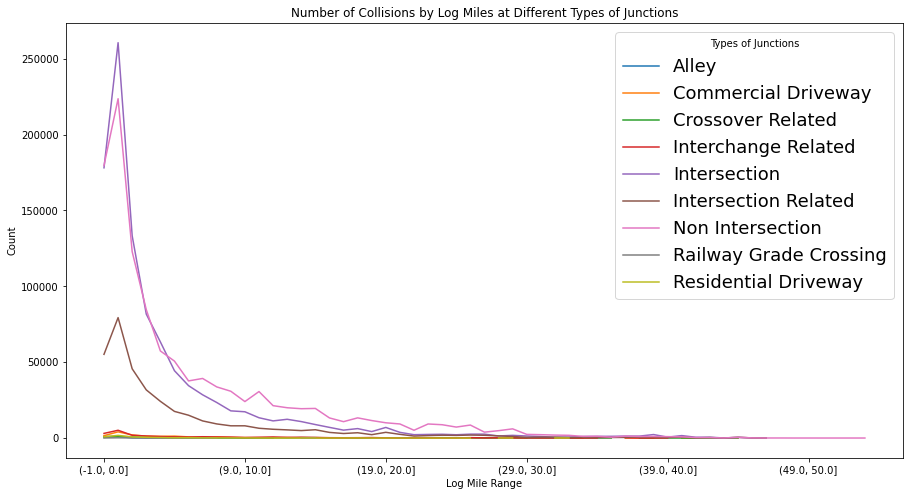

In [ ]:
crashes_count_junc = crashes_person_veh.where(crashes_person_veh['junction_desc'] != 'Not Applicable').pivot_table('log_mile_till_70', aggfunc = np.size, columns = ['junction_desc'], index = crashes_person_veh.log_mile_till_70)
crashes_count_junc.plot(figsize=(15,8), subplots = False, sharex = False, sharey = False)
plt.legend(fontsize=18).set_title("Types of Junctions")
plt.title("Number of Collisions by Log Miles at Different Types of Junctions")
plt.xlabel("Log Mile Range")
plt.ylabel("Count")
hide_toggle()

- We can clearly see that in the initial couple of miles of a road, collisions at Intersetions are the highest
- As soon as we cross the 4-5th mile range, Non-Intersection related collisions take the lead
- The third highest junction type in number of crashes is "Not Applicable". This is a significant limitation towards conducting a thorough analysis
- The 4th highest junction type available is "Intersection Related". We are not sure how this one relates to "Intersection" juction. Hence, we ignore this juction type for our analysis

### Number of Crashes at Different Junctions Segregated by Collisions Types

In order to better prepare for situations where a crash happens, we need to look into different types of collisions that take place in huge numbers at these junctions. In the above chart since, we found the two most prominent junctions by number of crashes to be "Intersection" and "Non Intersection" we will be focusing on these two for our analysis ahead.

In [ ]:
conds = [crashes_person_veh['junction_desc'].isin(['Intersection']),
         crashes_person_veh['junction_desc'].isin(['Non Intersection'])]
values = ['Intersection', 'Non Intersection']
crashes_person_veh['int_non-int_junc_desc'] = np.select(conds, values, default = "NaN")
hide_toggle()

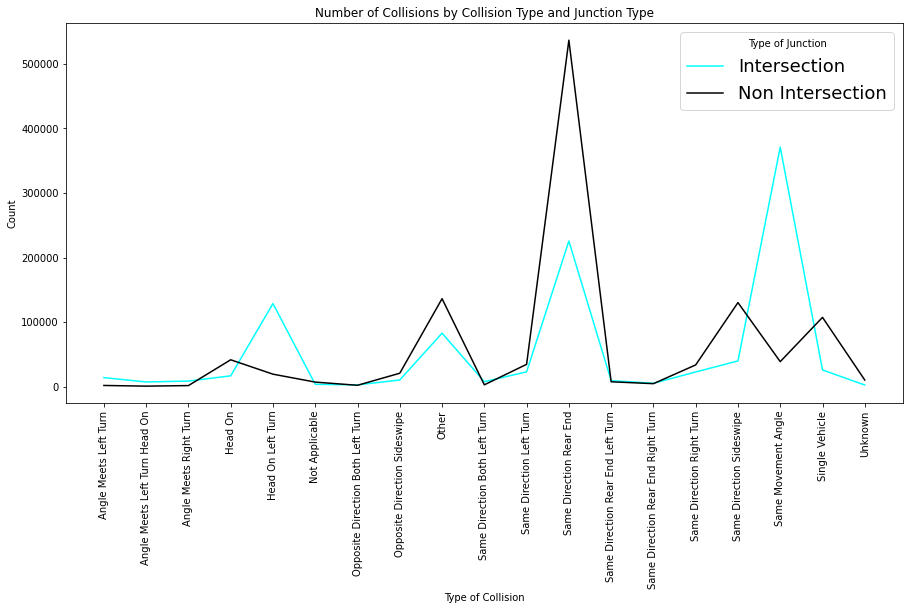

In [ ]:
crashes_count_collision_junc = crashes_person_veh.where(crashes_person_veh['int_non-int_junc_desc'] != "NaN").pivot_table('collision_type_desc', aggfunc = 'count', columns = ['int_non-int_junc_desc'], index = crashes_person_veh.collision_type_desc)
crashes_count_collision_junc.plot(figsize=(15,7), subplots = False, color = colorbar)
plt.xticks(range(0, len(crashes_count_collision_junc.index)), crashes_count_collision_junc.index, rotation = 90)
plt.legend(crashes_count_collision_junc.columns, fontsize=18).set_title("Type of Junction")
plt.title("Number of Collisions by Collision Type and Junction Type")
plt.xlabel("Type of Collision")
plt.ylabel("Count")
plt.show()
hide_toggle()

Here we see that at "Intersection" junctions following type of collisons are more likely to happen:
- Same Movement Angle
- Head on Left Turn
- Same Direction Both Left Turn
- Angle Meets Right Turn
- Angle Meets Left Turn Head On
- Angle Meets Left Turn

At "Non-Intersection" junctions following type of collisions are more likely to happen:
- Single Vehicle
- Same Direction Sideswipe
- Same Direction Rear End
- Opposite Direction Sideswipe
- Head on

We can deduce that more collisions occur at intersections when vehicles are turning, whereas at Non-Intersection junctions more collisions like sideswipe, rear end and head-on collisons take place.

We are tempted to delve deeper into the root factors affecting the number of crashes at various locations

Now we try to see that whether a physical division between roads serves as a boon or a bane

In [ ]:
conds2 = [crashes_person_veh['rd_div_desc'].isin(['One-way Trafficway']),
         crashes_person_veh['rd_div_desc'].isin(['Two-way, Not Divided']),
         crashes_person_veh['rd_div_desc'].isin(['Two-way, Divided, Positive Median Barrier']),
         crashes_person_veh['rd_div_desc'].isin(['Two-way, Divided, Unprotected (painted >4 feet) Median'])]
values2 = ['One-way', 'Two-way Undivided', 'Two-way Divided with Barrier', 'Two-way Divided with >4 Feet Paint']
crashes_person_veh['rd_div_desc_new'] = np.select(conds2, values2, default = "NaN")
hide_toggle()

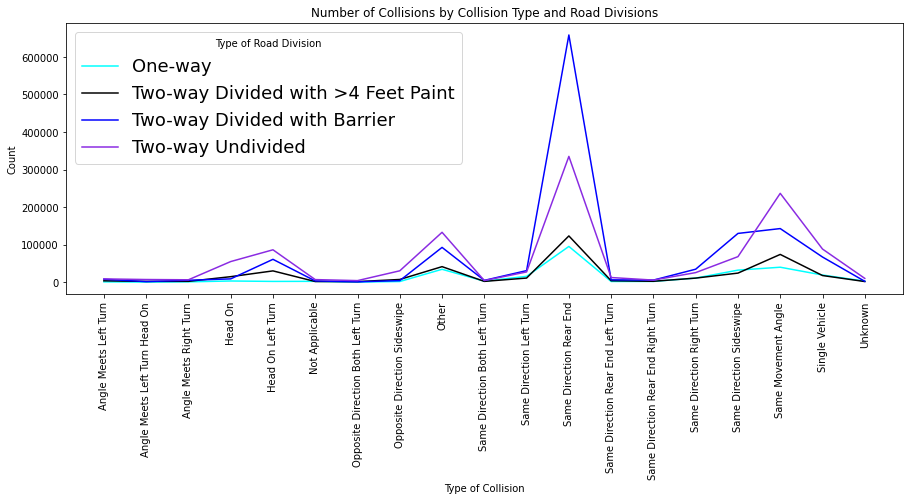

In [ ]:
crashes_count_collision_rd_div = crashes_person_veh.where(crashes_person_veh['rd_div_desc_new'] != 'NaN').pivot_table('collision_type_desc', aggfunc = 'count', columns = ['rd_div_desc_new'], index = crashes_person_veh.collision_type_desc)
crashes_count_collision_rd_div.plot(figsize=(15,5), subplots = False, color = colorbar)
plt.xticks(range(0, len(crashes_count_collision_rd_div.index)), crashes_count_collision_rd_div.index, rotation = 90)
plt.legend(crashes_count_collision_rd_div.columns, fontsize=18).set_title("Type of Road Division")
plt.title("Number of Collisions by Collision Type and Road Divisions")
plt.xlabel("Type of Collision")
plt.ylabel("Count")
plt.show()
hide_toggle()

- Here we can see that for most of the collision types, numbers are higher where there is no division between the two way roads.
- Crashes like "Same Direction Rear End", "Same Movement Angle" and "Same Direction Sideswipe" occur more where the Two-way roads are divided by a physical barrier. 
- Surprisingly, for two-way roads where the division is just a >4 feet painted section, the number of collisons are significantly less than other types of road divisions

Now that we have some understanding of which type of accidents occur where, lets head towards understanding the causes of these accidents.

## Factors Affecting Collisions and Severity of Injuries

It is not surprising to hear if someone tells us that accidents mostly happen due to bad weather conditions or due to unfavorable road conditions. But what if we tell you that we found that the highest number of accidents as well as the most severe accidents took place during clear weather and when there were no deffects on the roads? Surprising, right?

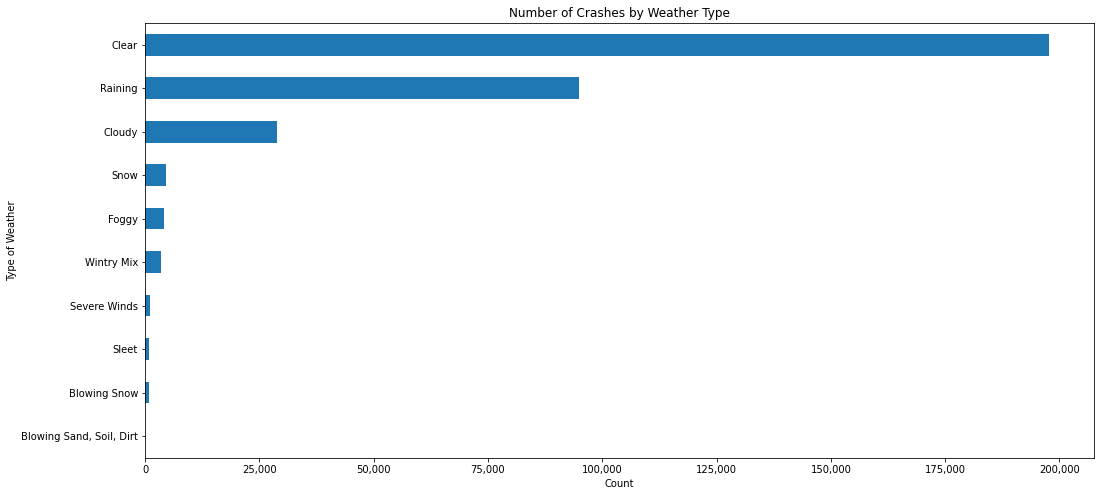

In [ ]:
plt.figure(figsize=(17,8))
ax = crashes['weather_desc'][np.logical_not(crashes['weather_desc'].isin(["Not Applicable", "Unknown", "Other"]))].value_counts().sort_values(ascending=True).tail(10).plot(kind='barh')
ax.set_title("Number of Crashes by Weather Type")
ax.set_ylabel("Type of Weather")
ax.set_xlabel("Count")
ax.get_xaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
)
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
hide_toggle()

- Evidently, the highest number of accidents happen in clear weather

### Severity of Accidents according to weather

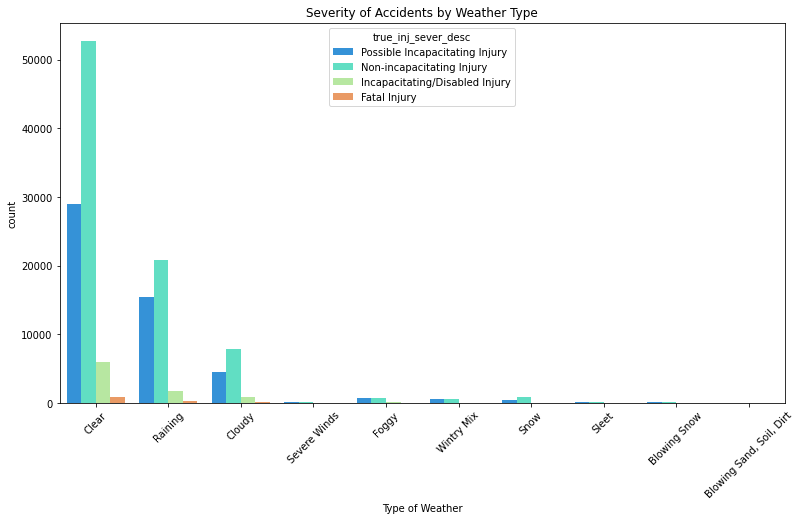

In [ ]:
plt.figure(figsize=(13,7))
plt.xticks(rotation = 45)
sns.countplot(x=crashes_persons['weather_desc'][np.logical_not(crashes_persons['weather_desc'].isin(["Not Applicable", "Unknown", "Other"]))],data=crashes_persons,hue='true_inj_sever_desc',palette='rainbow')
plt.title("Severity of Accidents by Weather Type")
plt.xlabel("Type of Weather")
plt.show()
hide_toggle()

- Here, we can see that even if we take out inidents where no injury happened, most of the accidents happen in clear weather only, followed by Raining and cloudy weather

### Road Condition in referrence to severity of Accidents

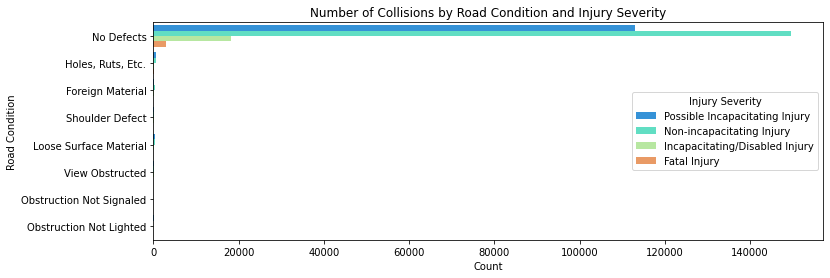

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(y=crashes_persons['rd_cond_desc'][np.logical_not(crashes_persons['rd_cond_desc'].isin(["Not Applicable", "Unknown", "Other"]))],data=crashes_persons,hue='true_inj_sever_desc',palette='rainbow')
plt.title("Number of Collisions by Road Condition and Injury Severity")
plt.xlabel("Count")
plt.ylabel("Road Condition")
plt.legend().set_title("Injury Severity")
hide_toggle()

- As we said, incidents where most crashes happened resulting in an injury, most of them happened at roads with No Deffects
- It turns out Road Condition was not a contributing factor to the number of accidents resulting in injuries

### Surface Condition in referrence to severity of Accidents

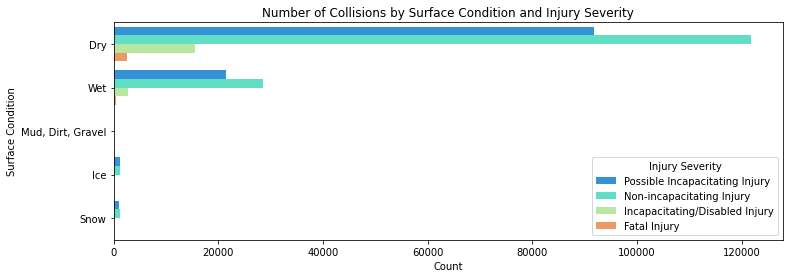

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(y=crashes_persons['surf_cond_desc'][np.logical_not(crashes_persons['surf_cond_desc'].isin(["Not Applicable", "Unknown", "Other"]))],data=crashes_persons,hue='true_inj_sever_desc',palette='rainbow')
plt.title("Number of Collisions by Surface Condition and Injury Severity")
plt.xlabel("Count")
plt.ylabel("Surface Condition")
plt.legend().set_title("Injury Severity")
hide_toggle()

- Again incidents where most injuries were taking place, the surface was found to be dry.
- However, we do have a high number of injuries where the surface was wet. It turns out that surface condition was infact to some extent a contributing factor to the number of accidents resulting in injuries.

## Fatality

Now that we figured out number of collisions by Injury severity, our ultimate aim is to reduce the number of fatalities due to collisions. For this we need to look at why and how most fatalities occur due to collisions

In [ ]:
fatal = crashes_persons[crashes_persons['inj_sever_desc'] == 'Fatal Injury']
hide_toggle()

In [ ]:
# How many people on average die in accidents in the state of Maryland each day
fatal['accident_datetime'].dt.date.value_counts(dropna = True).mean()
hide_toggle()

-	On an average about 1.88 ~ 2 Fatal accidents happen each day in the state of Maryland

In [ ]:
#creating a new column for only fatal injury types
crashes_persons['fatal_inj_sever_desc'] = crashes_persons['inj_sever_desc'].where(crashes_persons['inj_sever_desc'] == "Fatal Injury")
hide_toggle()

## Fatal Injuries by Collision Type

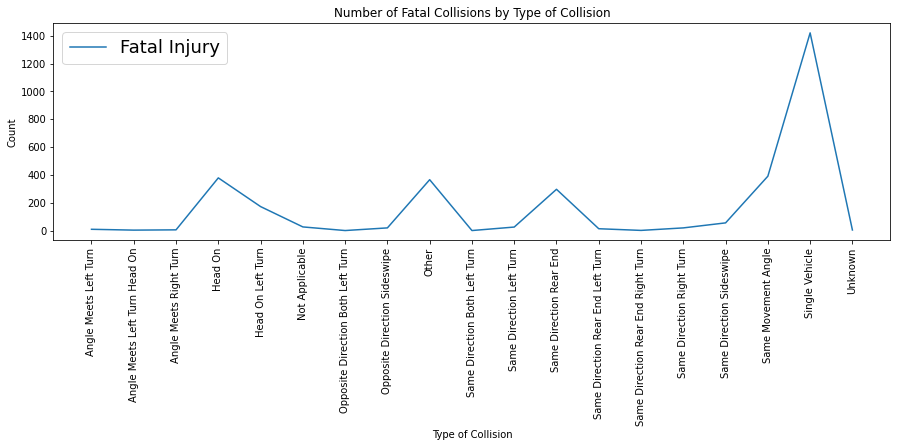

In [ ]:
fatal_injury_collision_type = crashes_persons.pivot_table('collision_type_desc', aggfunc = 'count', columns = ['fatal_inj_sever_desc'], index = crashes_persons.collision_type_desc)
fatal_injury_collision_type.plot(figsize=(15,4), subplots = False)
plt.xticks(range(0, len(fatal_injury_collision_type.index)), fatal_injury_collision_type.index, rotation = 90)
plt.legend(fatal_injury_collision_type.columns, fontsize=18)
plt.title("Number of Fatal Collisions by Type of Collision")
plt.xlabel("Type of Collision")
plt.ylabel("Count")
plt.show()
hide_toggle()

- We see that most fatal injuries happen with "Single Vehicles". Since a single vehicle is involved, there should be a fixed object with which the vehicle must have collided to turn into a fatal accident. Below we see which fixed objects we have and which had most fatal crashes.

In [ ]:
crashes['fix_obj_desc'].value_counts()
hide_toggle()

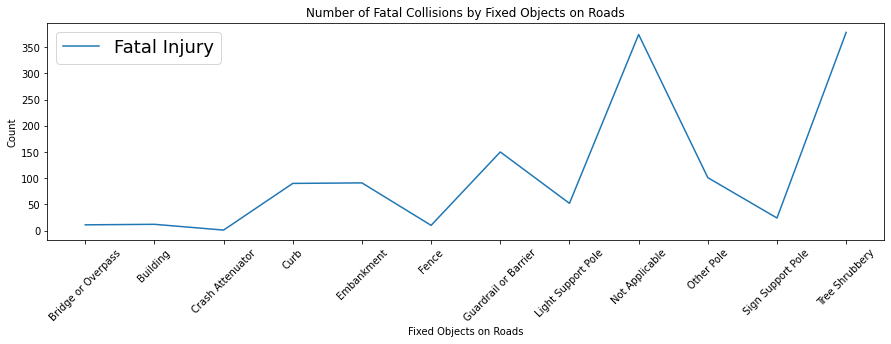

In [ ]:
fatal_injury_fix_obj = crashes_persons.where(crashes_persons['collision_type_desc']=='Single Vehicle').pivot_table('fix_obj_desc', aggfunc = 'count', columns = ['fatal_inj_sever_desc'], index = crashes_persons.fix_obj_desc)
fatal_injury_fix_obj.plot(figsize=(15,4), subplots = False)
plt.xticks(range(0, len(fatal_injury_fix_obj.index)), fatal_injury_fix_obj.index, rotation = 45)
plt.legend(fatal_injury_fix_obj.columns, fontsize=18)
plt.title("Number of Fatal Collisions by Fixed Objects on Roads")
plt.xlabel("Fixed Objects on Roads")
plt.ylabel("Count")
plt.show()
hide_toggle()

Most of the fatal crashes involving single vehicles, collisions happened with "Tree Shrubbery". This is followed by crashes with Guardrails, Embankments and Curbs. What is also noteworthy is that for Crash Attenuators we do not have even a single fatal accident reported out of the 443 collisions with Crash Attenuators.

We suggest that if more crash attenuators are installed between driveways and Tree Shrubberies, Embankments, Guardrails and Curbs, it will help in significantly reducing the number of fatalities. 

Also, the second highest number of fatal crashes involves "Not Applicable". In this case we consider "Not Applicable" as no fixed objects and continue our analysis for cases where Single vehicles were involved in a fatal accident without colliding to a fixed object

Here we look deeper into fatal crashes involving No fixed objects

In [ ]:
crashes_persons['fix_obj_na'] = crashes_persons['fix_obj_desc'].where(crashes_persons['fix_obj_desc'] == "Not Applicable")
hide_toggle()

In [ ]:
fatal_inj_fix_obj_na_lane = crashes_persons.where(crashes_persons['collision_type_desc']=='Single Vehicle').groupby(['fatal_inj_sever_desc', 'fix_obj_na', 'lane_desc']).size()
hide_toggle()

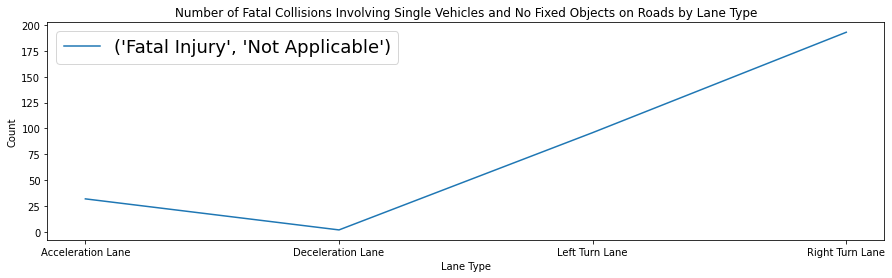

In [ ]:
fatal_inj_fix_obj_na_lane = crashes_persons.where(crashes_persons['collision_type_desc']=='Single Vehicle').pivot_table('lane_desc', aggfunc = 'count', columns = ['fatal_inj_sever_desc', 'fix_obj_na'], index = crashes_persons.lane_desc)
fatal_inj_fix_obj_na_lane.plot(figsize=(15,4), subplots = False)
plt.xticks(range(0, len(fatal_inj_fix_obj_na_lane.index)), fatal_inj_fix_obj_na_lane.index)
plt.legend(fatal_inj_fix_obj_na_lane.columns, fontsize=18)
plt.title("Number of Fatal Collisions Involving Single Vehicles and No Fixed Objects on Roads by Lane Type")
plt.xlabel("Lane Type")
plt.ylabel("Count")
plt.show()
hide_toggle()

- We see that most Fatal Injuries for Single Vehicle accidents involving no fixed objects take place in Right Turn and Left Turn Lanes.

Lets look at the event descriptions for these crashes

In [ ]:
crashes_persons.where(crashes_persons['collision_type_desc']=='Single Vehicle').groupby(['fatal_inj_sever_desc', 'fix_obj_na', 'harm_event_desc1']).size()
hide_toggle()

In [ ]:
crashes_persons.where(crashes_persons['collision_type_desc']=='Single Vehicle').groupby(['fatal_inj_sever_desc', 'fix_obj_na', 'harm_event_desc2']).size()
hide_toggle()

- For most of the cases with Fatal Injuries where no fixed object was involved, collisions happened with pedestrians
- There were also cases where the vehicle overturned, went off road or collided with an animal

# Section 2

## Crash Analysis by Car Make and Model

In this section we talk about some extra studies we conducted on the dataset. Here we have emphasized on Car Makes and Model that were involved in crashes.

In [ ]:
vehicles['veh_make'][:50]
hide_toggle()

In [ ]:
# Clubbing repeating Car Manufacturers into 1 value for each manufacturer
makes = {"ACURA",
 "ALLIS CHALMERS",
 "ALPHA ROMEO",
 "AMC",
 "AUDI",
 "BMW",
 "BRIGGS & STRATTON",
 "BUICK",
 "CADILLAC",
 "CATERPILLAR",
 "CHEVROLET",
 "CHRYSLER",
 "CONTINENTAL",
 "CUMMINS",
 "DETROIT DIESEL",
 "DEUTZ",
 "DODGE",
 "FIAT",
 "FORD",
 "GEO",
 "GMC",
 "HENSHEL",
 "HERCULES",
 "HINO",
 "HONDA",
 "HUNMER",
 "HYUNDAI",
 "INFINITY",
 "INTERNATIONAL",
 "ISUZU",
 "IVECO-FIAT",
 "JAGUAR",
 "JEEP",
 "JOHN DEERE",
 "KIA",
 "KOHLER",
 "KOMATSU",
 "KUBOTA",
 "LAND ROVER",
 "LEXUS",
 "LINCOLN",
 "LISTER PETTER",
 "MACK",
 "MAZDA",
 "MERCEDES",
 "MERCURY",
 "MINI COOPER",
 "MITSUBISHI",
 "NISSAN",
 "OLDSMOBILE",
 "ONAN",
 "PERKINS",
 "PEUGEOT",
 "PLYMOUTH",
 "PONTIAC",
 "PORSCHE",
 "RENAULT",
 "SAAB",
 "SATURN",
 "SCANIA",
 "SCION",
 "SUBARU",
 "SUZUKI",
 "TESLA",
 "TOYOTA",
 "VOLKSWAGEN",
 "VOLVO",
 "WISCONSIN",
 "YANMER-MARINE"}
hide_toggle()

In [ ]:
#https://stackoverflow.com/questions/17388213/find-the-similarity-metric-between-two-strings
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a.upper(), b.upper()).ratio()

# similar('volk1', 'VOLKSWAGEN')
hide_toggle()

In [ ]:
 #https://stackoverflow.com/questions/7331462/check-if-a-string-is-a-possible-abbrevation-for-a-name
import re    
def is_abbrev(abbrev, text):
    try:
      pattern = ".*".join(abbrev.upper())
      return re.match("^" + pattern, text.upper()) is not None
    except:
      print(abbrev, text)
      raise Exception('error')

# is_abbrev('inf', 'INFINITI')
hide_toggle()

In [ ]:
import re
def clean_string(word):
  return re.sub('[^A-Za-z0-9]+', '', word).upper()

#clean_string('JEE[')
hide_toggle()

In [ ]:
def get_correct_make(value):
  if type(value) != str:
    return None

  value = clean_string(value)
  if value in makes:
    return value

  for make in makes:
    if is_abbrev(value, make) == True:
      return make

  for make in makes:
    if similar(value, make) >= 0.6 :
      return make

  return None

# get_correct_make('tyt')
hide_toggle()

In [ ]:
corrections = {
    'CHEVY': 'CHEVROLET'
}

for make in set(vehicles['veh_make']):
  correct_brand = get_correct_make(make)
  corrections[make] = correct_brand
hide_toggle()

In [ ]:
#### corrections
def get_correct_value(value):
  if value not in corrections:
    return None
  # print(value, type(value))
  return corrections[value]
hide_toggle()

In [ ]:
vehicles['veh_make_clean'] = [ get_correct_value(x) for x in vehicles['veh_make']]
hide_toggle()

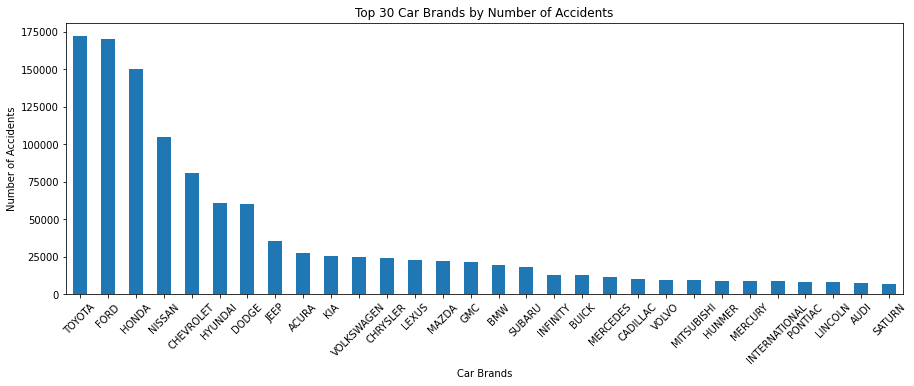

In [ ]:
vehicles['veh_make_clean'].value_counts()[:30].plot(kind='bar', figsize= (15, 5))
plt.title('Top 30 Car Brands by Number of Accidents')
plt.xlabel("Car Brands")
plt.ylabel("Number of Accidents")
plt.xticks(rotation = 45)
plt.show()
hide_toggle()

- We can see that Toyota and Ford cars have the highest number of crashes followed by Honda, Nissan and Chevrolet

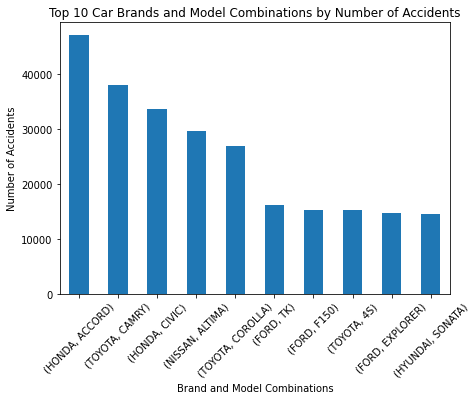

In [ ]:
vehicles[['veh_make_clean','veh_model']].value_counts()[:10].plot(kind='bar',  figsize= (7, 5))
plt.title('Top 10 Car Brands and Model Combinations by Number of Accidents')
plt.ylabel("Number of Accidents")
plt.xlabel("Brand and Model Combinations")
plt.xticks(rotation = 45)
plt.show()
hide_toggle()

- Honda Accord tops the list of cars with most accidents followed by Toyota Camry and Honda Civic at the 2nd and 3nd places respectively

We saw which cars and manufacturers have the most crashes. But what about the car make year?

Lets find out if cars made in a particular are more prone to crashes

In [ ]:
vehicles_year = vehicles['veh_year']
vehicles_year.dropna(inplace=True)
vehicles_year = vehicles_year.astype(int)
hide_toggle()

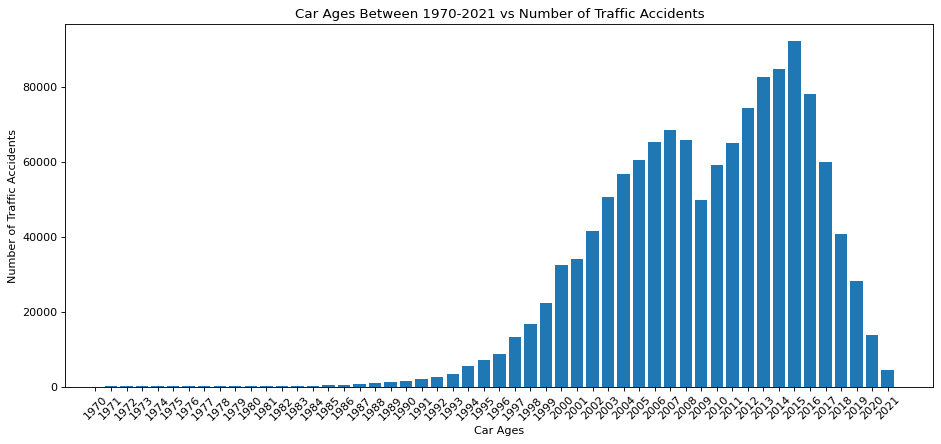

In [ ]:
plt.figure(figsize=(14, 6), dpi=80)

vehicle_year_counts = vehicles_year[(vehicles_year > 1970) & (vehicles_year < 2022)].value_counts()
vehicle_year_counts.sort_index(inplace=True)
# vehicle_year_counts.plot()
plt.bar(vehicle_year_counts.index, vehicle_year_counts)
plt.xticks(list(range(1970, 2022)), rotation=45)
plt.title("Car Ages Between 1970-2021 vs Number of Traffic Accidents")
plt.ylabel("Number of Traffic Accidents")
plt.xlabel("Car Ages")
plt.show()
hide_toggle()

##### Some Interesting Facts Come to Light Here

- Cars made in 2009 have a significantly low rate of accidents as compared to the cars made in years before and ahead of them. Our hypothesis is that this could be due to the financial crisis of 2008. With people losing jobs and market falling, the purchasing power of the public had declined, leading to lesser cars made in 2009 being sold. This could be one of the reasons for the dip in number of crashes for cars of 2009 make.
- Surely, in the upcoming years after 2009, we can see the car makes moving to higher number of crashes, with cars made in 2015 topping our list of crashes
- It is noteworthy that there is a sharp decline in the number of crashes for cars made in 2016 and beyond.

These estimates could depend upon a variety of factors including total car sales in a given year, quality of parts used over the years, probably even launch of AI enabled cars in the recent years and many more. If more data with respect to such factors was available we could delve deeper into factors affecting the rise and fall in number of crashes by Car Make Year.

### Licence class with more number of accidents

In this analysis we try to figure out the License class linked with maxium number of accidents.


> This analysis will help the state when they are performing driving tests, so they will be more careful with the license class associated with maximum accidents. 



https://mva.maryland.gov/drivers/Pages/drivers-class-codes.aspx -> as per this website there are 4 license class A,B,C,M. Hence, we have considered only these license classes.

In [ ]:
license
fila = crashes_persons['class'] == 'A'  ##change this feild to see results for class A,B,C and M
licensea = crashes_persons.loc[fila]['inj_sever_desc'].value_counts()
print(licensea)
hide_toggle()

No Injury                         20179
Non-incapacitating Injury          1102
Possible Incapacitating Injury      818
Incapacitating/Disabled Injury      158
Fatal Injury                         50
Name: inj_sever_desc, dtype: int64


In [ ]:
license
filb = crashes_persons['class'] == 'B'  ##change this feild to see results for class A,B,C and M
licenseb = crashes_persons.loc[filb]['inj_sever_desc'].value_counts()
print(licenseb)
hide_toggle()

No Injury                         19501
Non-incapacitating Injury          1023
Possible Incapacitating Injury      714
Incapacitating/Disabled Injury       90
Fatal Injury                         19
Name: inj_sever_desc, dtype: int64


In [ ]:
license
film = crashes_persons['class'] == 'M'  ##change this feild to see results for class A,B,C and M
licensem = crashes_persons.loc[film]['inj_sever_desc'].value_counts()
print(licensem)
hide_toggle()

No Injury                         414
Possible Incapacitating Injury     80
Non-incapacitating Injury          52
Incapacitating/Disabled Injury     33
Fatal Injury                        4
Name: inj_sever_desc, dtype: int64


In [ ]:
license
filt = crashes_persons['class'] == 'C'  ##change this feild to see results for class A,B,C and M
license = crashes_persons.loc[filt]['inj_sever_desc'].value_counts()
print(license)
hide_toggle()

No Injury                         555247
Non-incapacitating Injury          71813
Possible Incapacitating Injury     53283
Incapacitating/Disabled Injury      8515
Fatal Injury                        1351
Name: inj_sever_desc, dtype: int64


- With the above analysis we conclude that **Class C** has the most number of Fatal Accidents and the state should be more careful while providing these licenses.

# Section 3

## Gender distribution across types of crash incidents

While conducting this analysis something interesting came our way. Growing up we have always heard at some or the other occassion that women are not good enough drivers when compared to men. Its high time we **"CRASH"** this mindset.

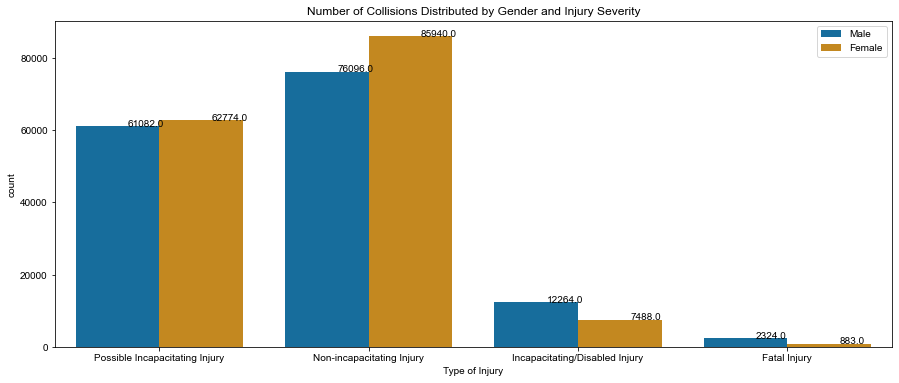

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x ='true_inj_sever_desc', hue = crashes_persons['sex_code'].where(crashes_persons['sex_code']!= "U"), data = crashes_persons, palette = sns.color_palette("colorblind", n_colors = 2))

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))  #https://www.tutorialspoint.com/matplotlib-how-to-show-the-count-values-on-the-top-of-a-bar-in-a-countplot 

plt.legend(labels=['Male', 'Female'])
sns.set(rc={'figure.figsize':(20,8)})
plt.title("Number of Collisions Distributed by Gender and Injury Severity")
plt.xlabel("Type of Injury")
plt.show()
hide_toggle()

- Contrary to popular belief we see that for the injuries that were **Incapacitating** and **Fatal**, there are more male drivers involved.
- Also, for Possible incapacitating injuries, the difference between males and females is miniscule

#### NEED WE SAY MORE?

# Conclusion: 

> To summarize the complete analysis, maximum fatal injuries happen in the same direction rear end right turn at speed of 55mph, the state government allocating medical forces nearby these roads could be a way to lessen the chances of Fatal/Incapacitating injuries. It was surprising to see that there are more fatal injuries in Clear Weather in comparison to Severe Winds, however weather wasn’t a major contributing factor to the analysis. From the analysis so far, we are certain that maximum number of accidents happened during the rush hours of 7am-9am and 3pm-5pm, with Fatal accidents been the most during the afternoon. With the pandemic hitting worldwide and people working remotely, there was 20% decrease in the crashes during pandemic.



Limitation: We have a lot of values for junction codes, weather condition, road condition, surface condition wherever the values are *Not Applicable* - the count of accidents is 3rd largest. There are *Unknown* and *Others* values as well, so we have not considered for our projections. Hence, we are not able to address those collision types.